In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Preprocessing

In [2]:
data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

In [3]:
data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


#### CreditScore, Geography, Gender, Age, Tenure, Balance, NumProducts, HasCrCard, IsActiveMember, EstimatedSalary. These would be the important columns that might be relevent to predict the answer.

In [4]:
data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### Checking Distribution of "Exited" Class

<Axes: xlabel='Exited'>

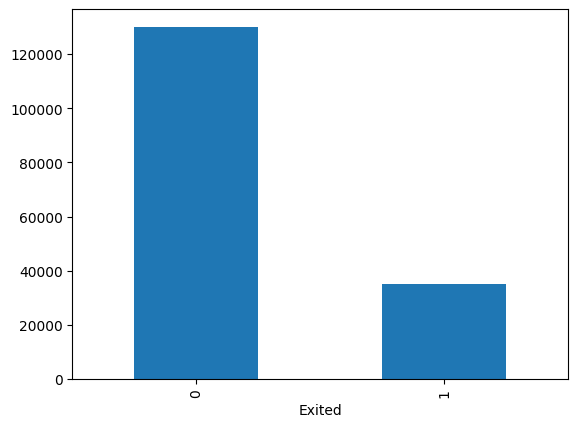

In [5]:
import matplotlib.pyplot as plt
data["Exited"].value_counts().plot(kind='bar')

#### There is a major imbalance in the data. We can fix it by OverSampling the minority class

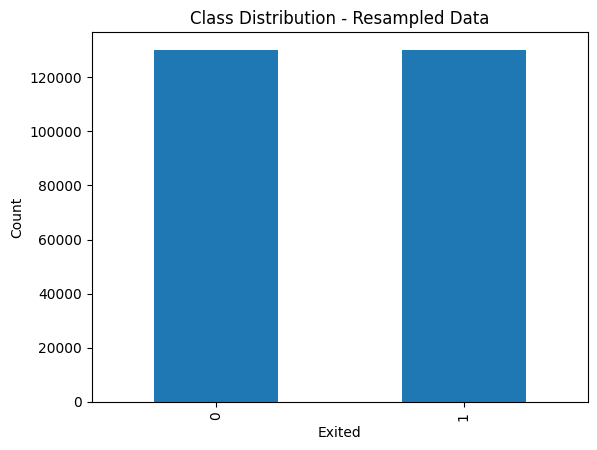

In [6]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

X = data.drop("Exited", axis=1)  # Features
y = data["Exited"]  # Target variable

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto')

# Fit and transform the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="Exited")], axis=1)

# Plotting the bar chart for the resampled data
data["Exited"].value_counts().plot(kind='bar')

# Adding labels and title
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Class Distribution - Resampled Data')

plt.show()


#### Label Encode the Gender Column, OneHotEncode the Geography Column

In [7]:
# data = data.sample(frac=0.1)
data = pd.get_dummies(data, columns=['Geography'], prefix='Geography')
columns_used = ["CreditScore", "Age", "Gender", "Geography_France", "Geography_Germany", "Geography_Spain", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Geography_France"] = le.fit_transform(data["Geography_France"])
data["Geography_Germany"] = le.fit_transform(data["Geography_Germany"])
data["Geography_Spain"] = le.fit_transform(data["Geography_Spain"])
X = data[columns_used].copy()
y = data["Exited"].copy()

# Normalization 

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to each column in your DataFrame
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [9]:
X

,CreditScore,Age,Gender,Geography_France,Geography_Germany,Geography_Spain,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.636,0.202703,1.0,1.0,0.0,0.0,0.3,0.000000,0.333333,1.0,0.0,0.907279
1,0.554,0.202703,1.0,1.0,0.0,0.0,0.1,0.000000,0.333333,1.0,1.0,0.247483
2,0.656,0.297297,1.0,1.0,0.0,0.0,1.0,0.000000,0.333333,1.0,0.0,0.924364
3,0.462,0.216216,1.0,1.0,0.0,0.0,0.2,0.593398,0.000000,1.0,1.0,0.422787
4,0.732,0.202703,1.0,0.0,0.0,1.0,0.5,0.000000,0.333333,1.0,1.0,0.075293
...,...,...,...,...,...,...,...,...,...,...,...,...
260221,0.682,0.256757,0.0,0.0,1.0,0.0,0.7,0.490508,0.000000,1.0,0.0,0.490801
260222,0.632,0.432432,0.0,0.0,1.0,0.0,0.4,0.434688,0.000000,1.0,0.0,0.700690
260223,0.880,0.256757,0.0,0.0,1.0,0.0,0.3,0.472817,0.000000,1.0,0.0,0.176646
260224,0.788,0.378378,0.0,1.0,0.0,0.0,0.9,0.000000,0.000000,1.0,0.0,0.607204


In [10]:
X.describe()

,CreditScore,Age,Gender,Geography_France,Geography_Germany,Geography_Spain,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,260226.000000,260226.000000,260226.000000,260226.000000,260226.000000,260226.000000,260226.000000,260226.000000,260226.000000,260226.000000,260226.000000,260226.000000
mean,0.609894,0.300851,0.513073,0.525628,0.269197,0.205176,0.497742,0.244062,0.157258,0.746847,0.423351,0.566335
std,0.161008,0.126412,0.499830,0.499344,0.443543,0.403831,0.281349,0.252018,0.200871,0.434819,0.494091,0.251608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.492000,0.216216,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.374232
50%,0.612000,0.283784,1.000000,1.000000,0.000000,0.000000,0.500000,0.230310,0.000000,1.000000,0.000000,0.596740
75%,0.720000,0.378378,1.000000,1.000000,1.000000,0.000000,0.700000,0.487551,0.333333,1.000000,1.000000,0.783887
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building the Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.ensemble import StackingClassifier

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/25
7319/7319 [==============================] - 26s 3ms/step - loss: 0.4469 - accuracy: 0.7911 - val_loss: 0.4284 - val_accuracy: 0.8033
Epoch 2/25
7319/7319 [==============================] - 24s 3ms/step - loss: 0.4290 - accuracy: 0.8012 - val_loss: 0.4259 - val_accuracy: 0.8028
Epoch 3/25
7319/7319 [==============================] - 24s 3ms/step - loss: 0.4255 - accuracy: 0.8035 - val_loss: 0.4263 - val_accuracy: 0.8034
Epoch 4/25
7319/7319 [==============================] - 23s 3ms/step - loss: 0.4238 - accuracy: 0.8040 - val_loss: 0.4230 - val_accuracy: 0.8046
Epoch 5/25
7319/7319 [==============================] - 24s 3ms/step - loss: 0.4233 - accuracy: 0.8045 - val_loss: 0.4258 - val_accuracy: 0.8040
Epoch 6/25
7319/7319 [==============================] - 24s 3ms/step - loss: 0.4223 - accuracy: 0.8048 - val_loss: 0.4219 - val_accuracy: 0.8041
Epoch 7/25
7319/7319 [==============================] - 24s 3ms/step - loss: 0.4219 - accuracy: 0.8049 - val_loss: 0.4228 - val_ac

# Analyzing Performance using ConfusionMatrix

In [14]:
prob = model.predict(X_test)

814/814 [==============================] - 1s 1ms/step


In [15]:
pred = [0 if x<=0.5 else 1 for x in prob]

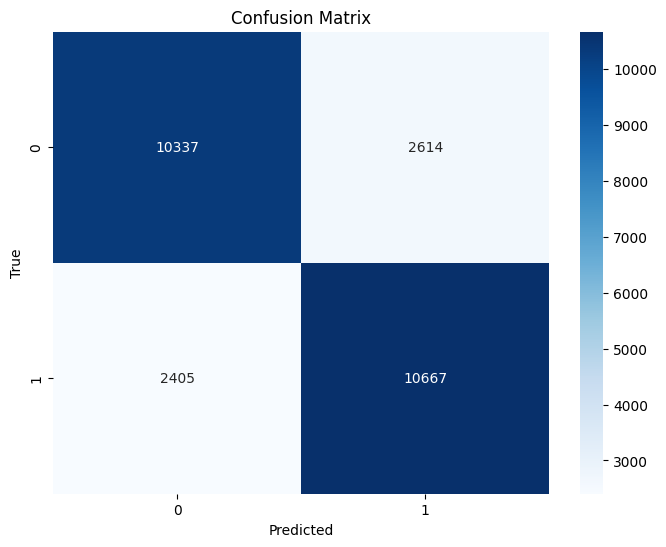

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [17]:
input_df = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
input_df = pd.get_dummies(input_df, columns=['Geography'], prefix='Geography')
le = LabelEncoder()
input_df["Gender"] = le.fit_transform(input_df["Gender"])
input_df["Geography_France"] = le.fit_transform(input_df["Geography_France"])
input_df["Geography_Germany"] = le.fit_transform(input_df["Geography_Germany"])
input_df["Geography_Spain"] = le.fit_transform(input_df["Geography_Spain"])
input_data = input_df[columns_used].copy()

In [18]:
input_data = pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns)

In [19]:
input_data = input_data.to_numpy()
output_data = model.predict(input_data)

3439/3439 [==============================] - 5s 1ms/step


In [20]:
output_df = pd.DataFrame({
    "id": input_df["id"],
    "Exited": output_data.reshape(-1)
})
output_df.to_csv('/kaggle/working/submission.csv', index=False)

In [21]:
output_df

,id,Exited
0,165034,0.100981
1,165035,0.975640
2,165036,0.091131
3,165037,0.545965
4,165038,0.683822
...,...,...
110018,275052,0.128520
110019,275053,0.123064
110020,275054,0.062000
110021,275055,0.450565
